In [4]:
# import libraries to read and plot statistical analyses of marine satellite data

In [5]:
%matplotlib inline


import pandas as pd
import xarray as xr
import numpy as np
import warnings
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec, ticker
from scipy.ndimage.filters import gaussian_filter
warnings.filterwarnings('ignore')
import glob
import seawater as sw
from dask.diagnostics import ProgressBar

Traga os dados para o seu computador local - utilize este comando para acessar a série temporal de dados de temperatura de superficie do mar disponinilizadas pelo Copernicus Marine Service  no link:

In [7]:
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "1998-01-01 00:00:00" --date-max "1998-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_1998 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "1999-01-01 00:00:00" --date-max "1999-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_1999 --user  --pwd 
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2000-01-01 00:00:00" --date-max "2000-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2000 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2001-01-01 00:00:00" --date-max "2001-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2001 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2002-01-01 00:00:00" --date-max "2002-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2002 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2003-01-01 00:00:00" --date-max "2003-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2003 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2004-01-01 00:00:00" --date-max "2004-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2004 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2005-01-01 00:00:00" --date-max "2005-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2005 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2006-01-01 00:00:00" --date-max "2006-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2006 --user  --pwd 
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2007-01-01 00:00:00" --date-max "2007-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2007 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2008-01-01 00:00:00" --date-max "2008-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2008 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2009-01-01 00:00:00" --date-max "2009-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2009 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2010-01-01 00:00:00" --date-max "2010-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2010 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2011-01-01 00:00:00" --date-max "2011-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2011 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2012-01-01 00:00:00" --date-max "2012-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2012 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2013-01-01 00:00:00" --date-max "2013-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2013 --user  --pwd 
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2014-01-01 00:00:00" --date-max "2014-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2014 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2015-01-01 00:00:00" --date-max "2015-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2015 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2016-01-01 00:00:00" --date-max "2016-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2016 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2017-01-01 00:00:00" --date-max "2017-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2017 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2018-01-01 00:00:00" --date-max "2018-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2018 --user  --pwd  
# !python3 -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service-id OCEANCOLOUR_GLO_CHL_L3_REP_OBSERVATIONS_009_065-TDS --product-id dataset-oc-glo-chl-multi_cci-l3-chl_4km_daily-rep-v02 --longitude-min -60.0 --longitude-max -40.0 --latitude-min -20.0 --latitude-max -40.0 --date-min "2019-01-01 00:00:00" --date-max "2019-12-31 00:00:00" --variable CHL --variable grid_mapping --out-dir /home/git/CMEMS/oc-cci-chl --out-name oc_cci_2019 --user  --pwd  

### Open CMEMS dataset

usando as bibliotecas python xarray e glob para abrir uma longa série temporal (multi-files) de dados em diferentes arquivos

In [8]:
fsource = sorted(glob.glob('/home/br/git/CMEMS/oc-cci-chl/oc_cci*'))

In [9]:
source   =  [xr.open_dataset(i, chunks={}) for i in fsource]
source = xr.concat(source, dim='time')

In [10]:
# load batimetria

dado = xr.open_dataset('/home/br/git/CMEMS/gebco-data/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

## Mask shelf

In [12]:
mask= source.sel(longitude=slice(-50.0, -40.0), latitude=slice(-22.0, -28))

In [13]:
mask_bat = dado.interp({'lon':mask.longitude, 'lat':mask.latitude}).elevation
dado.close()
mask.close()

In [14]:
# print(mask_cdm)

### médias e plots de série temporal

In [16]:
with ProgressBar():
    mean_chl = mask.mean(['longitude','latitude']).compute()

[########################################] | 100% Completed | 18.9s


Text(0.5, 1.0, 'oc-cci - clorophyll mass daily mean')

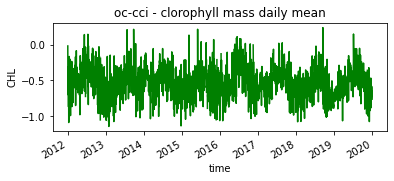

In [22]:
plt.figure(figsize=(6,2))
np.log10(mean_chl.CHL).sel(time=slice('2012','2020')).plot(x ="time" , color='green',linestyle='-')
plt.title('oc-cci - clorophyll mass daily mean')

Text(0.5, 1.0, 'oc-cci - clorophyll mass monthly mean time serie')

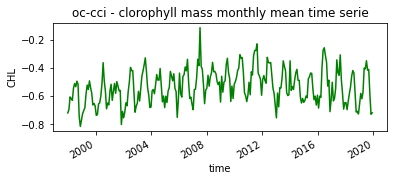

In [21]:
#

plt.figure(figsize=(6,2))
np.log10(mean_chl.CHL).resample(
         {'time':'30D'}
     ).mean().plot(x ="time" , color='green',linestyle='-')
plt.title('oc-cci - clorophyll mass monthly mean time serie')

#### Funçoes para criar seçoes e plotar diagramas de  Hovmollers - criando um vetor distancia dentro do subset

def extract_bar : seleciona uma área orientada de acordo com a linha de batimetria selecionada

def hov_ext_chl : Extrair os valores do subset do cmems de acordo com a batimetria selecionada, usada para representar diferentes distancias da costa ( 80 coastal, 200 - shelf, 2000 - open ocean)

In [23]:
# função montar uma matrix para um vetor de batimetria "suave #

def extract_bat(lon,lat,topo,level,flevel):
    CT = plt.contour(gaussian_filter(lon,flevel),
                     gaussian_filter(lat,flevel),gaussian_filter(topo,flevel),
                     [level],colors='black',latlon=True,linewidths=0.7,linestyles='solid')
    # CT = plt.contour(lon,lat,topo,[-100],colors='black',latlon=True,linewidths=0.7,linestyles='solid')
    lli = []
    for i in range(len(CT.allsegs[0])):
        print(CT.allsegs[0][i].shape[0])
        lli.append(CT.allsegs[0][i].shape[0])
        
    lbat = CT.allsegs[0][np.argmax(lli)]
    print('Maior shape é'.format(CT.allsegs[0][np.argmax(lli)].shape))

    return lbat[:,0],lbat[:,1]

In [24]:
def hov_ext_chl_dist(x,y,chl_file):

    hov_chl = []

    xi,yi = x.copy(),y.copy() 

    for i in range(len(xi)):
        print("{:03.1f}%".format(100*(i+1)/len(xi)),end="\r")
        hov_chl.append(source.sel(longitude=xi[i], latitude=yi[i], method='nearest'))

    hov_chl = xr.concat(hov_chl,dim='distance')
    hov_chl = hov_chl.assign_coords({'distance':np.hstack([0,np.cumsum(sw.dist(yi,xi)[0])])}) #


    with ProgressBar():
        hov_chl = hov_chl.compute()
        
    hov_chl = hov_chl.interpolate_na('distance').interpolate_na('time')
    
    return hov_chl

311
Maior shape é


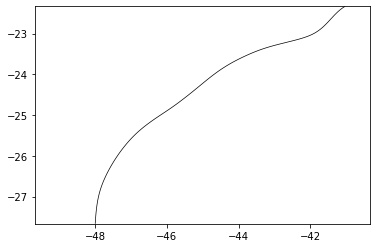

In [25]:
#----------- SELEÇÃO SEÇÕES DE ACORDO COM A BATIMETRIA SUAVE ---------------- #

xbat,ybat,zbat = mask_bat.lat.values,mask_bat.lon.values,mask_bat.values

x, y =  extract_bat(ybat, xbat, zbat, level = -80, flevel = 10) # SELECIONANDO VETORES
#x_1, y_1 = extract_bat(ybat, xbat, zbat, level = -200, flevel = 10)
#x_2, y_2 = extract_bat(ybat, xbat, zbat, level = -600, flevel = 10)
# x_3, y_3 = extract_bat(ybat, xbat, zbat, level = -2000, flevel = 10)


x,y = x[::10],y[::10]
#x_1,y_1 = x_1[::100],y_1[::100] 
#x_2,y_2 = x_2[::100],y_2[::100]
# x_3,y_3 = x_3[::100],y_3[::100]

#### Extraindo o dado da regiao de interesse determinada a partir da batimetria.

Aplicando a funçado hov_ext

In [26]:
hov_chl  = hov_ext_chl_dist(x,y,source)
# hov_chl_1  = hov_ext_chl_dist(x_1,y_1,source)
# hov_chl_2 = hov_ext_chl_dist(x_2,y_2,source)
# hov_chl_3 = hov_ext_chl_dist(x_3,y_3,source)

[########################################] | 100% Completed | 21.5s


#### Question- Como salvar essa variavel em um novo arquivo (subset CMEMS time serie ) netcdf4?

In [ ]:
#pwd

In [ ]:
#hov_chl.to_netcdf()

In [ ]:
#print(hov_chl)

#### teste correlaçao e covariancia entre os vetores

teste de correlaçao utilizando a funçado xr.corr e assim avaliar a similaridade entre as distancias

In [2]:
#xr.corr(hov_cdm.CDM, hov_cdm_2.CDM, dim="time")

In [ ]:
#xr.corr(hov_cdm_1.CDM, hov_cdm_2.CDM, dim="time")

In [ ]:
#xr.corr(hov_cdm_2.CDM, hov_cdm_3.CDM, dim="time")

#### Plot - hovmolllers em diferentes escalas de tempo

1. monthly mean long time serie
2. 3-daily mean time serie (year selection)

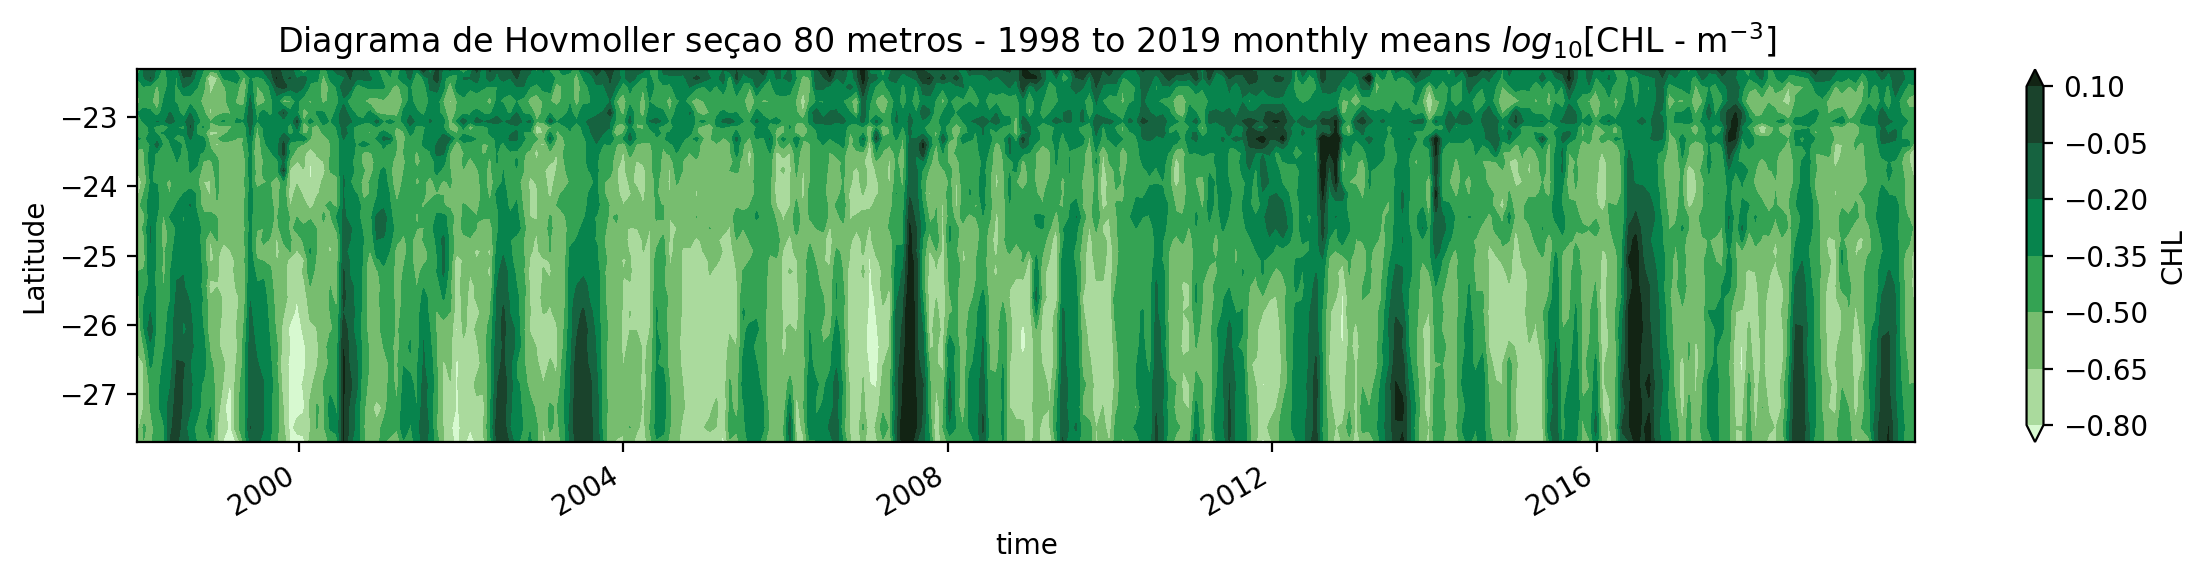

In [30]:
plt.figure(figsize=(12 ,3), dpi =200)
np.log10(hov_chl.CHL).resample({'time':'30D'}).mean().plot.contourf(
    y='latitude',vmin=-0.8,vmax= 0.1,cmap= cmo.cm.algae)
#plt.xlabel('month')
plt.ylabel('Latitude')
plt.title('Diagrama de Hovmoller seçao 80 metros - 1998 to 2019 monthly means ' r'$log_{10}$[CHL - m$^{-3}$]')
plt.tight_layout()

# plt.figure(figsize=(8 ,2), dpi =200)
# np.log10(hov_chl_2.CHL).resample({'time':'30D'}).mean().plot.contourf(y='latitude', cmap= cmo.cm.algae,robust=True)
# #plt.xlabel('month')
# plt.ylabel('Latitude')
# #plt.title('Hovmoller Diagram of Chlorophyll-a concentration Monthly-mean time-serie - 50 m')
# #plt.tight_layout()

# plt.figure(figsize=(8 ,2), dpi =200)
# np.log10(hov_chl_3.CHL).resample({'time':'30D'}).mean().plot.contourf(y='latitude', cmap= cmo.cm.algae,robust=True)
# #plt.xlabel('month')
# plt.ylabel('Latitude')
# #plt.title('Hovmoller Diagram of Chlorophyll-a concentration Monthly-mean time-serie - 50 m')
# #plt.tight_layout()

Text(0.5, 1.0, '3-daily mean of chlorophyll S. Atlantic coastal zone - 2018 - $log_{10}$ [CHL] (m$^{-3}$)')

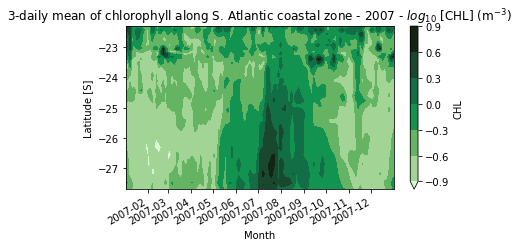

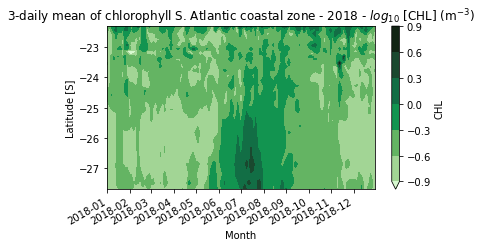

In [35]:
plt.figure(figsize=(6, 3))
np.log10(hov_chl.CHL).resample(
         {'time':'3D'} # reagrupando os dados
     ).mean().sel(
         time=slice('2007-01-01','2008-01-01') # slice para um ano especifico
     ).plot.contourf(y='latitude', cmap= cmo.cm.algae,robust=True)
plt.xlabel('Month')
plt.ylabel('Latitude [S]')
plt.title('3-daily mean of chlorophyll along S. Atlantic coastal zone - 2007 - $log_{10}$ [CHL] (m$^{-3}$)')

plt.figure(figsize=(6, 3))
np.log10(hov_chl.CHL).resample(
         {'time':'3D'} # reagrupando os dados
     ).mean().sel(
         time=slice('2018-01-01','2019-01-01') # slice para um ano especifico
     ).plot.contourf(y='latitude', cmap= cmo.cm.algae,robust=True)
plt.xlabel('Month')
plt.ylabel('Latitude [S]')
plt.title('3-daily mean of chlorophyll S. Atlantic coastal zone - 2018 - $log_{10}$ [CHL] (m$^{-3}$)')